### sea level predictor

In [6]:
# importiing the libraries
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [12]:
# loading the dataset
df = pd.read_csv("epa-sea-level.csv")
x=df["Year"]
y = df["CSIRO Adjusted Sea Level"]
df.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN
...,...,...,...,...,...
129,2009,8.586614,8.311024,8.862205,8.046354
130,2010,8.901575,8.618110,9.185039,8.122973
131,2011,8.964567,8.661417,9.267717,8.053065
132,2012,9.326772,8.992126,9.661417,8.457058


Text(0.5, 1.0, 'Rise in Sea Level')

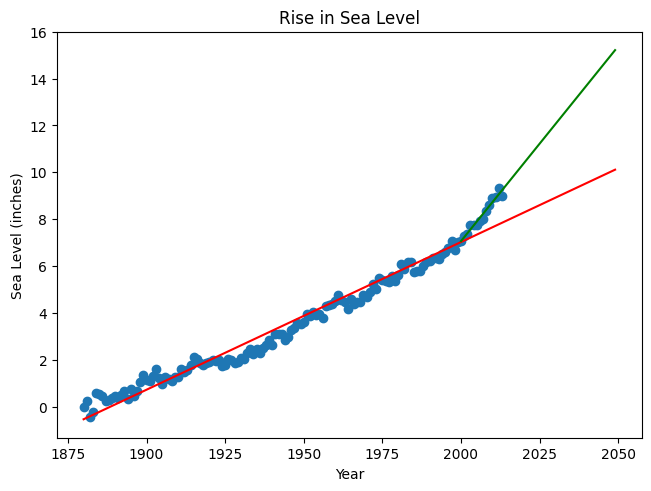

In [28]:
# Create scatter plot
fig, ax = plt.subplots( layout='constrained')
plt.scatter(x,y)

#first line of fit
res = linregress(df["Year"], df["CSIRO Adjusted Sea Level"]) #regression of y on x?

# plot first line of best fit
x_pred = pd.Series([i for i in range(1880,2050)]) #create a list of years up to 2050
y_pred = res.intercept + res.slope*x_pred
plt.plot(x_pred,y_pred, 'r', label='fitted line')

 # Create second line of best fit
new_df = df.loc[df["Year"] >= 2000]
new_x = new_df["Year"]
new_y = new_df["CSIRO Adjusted Sea Level"]

res2 = linregress(new_x, new_y)

x_pred2 = pd.Series([i for i in range(2000,2050)])
y_pred2 = res2.intercept + res2.slope*x_pred2
plt.plot(x_pred2,y_pred2, 'green', label='fitted line')
#labels
ax.set_ylabel("Sea Level (inches)")
ax.set_xlabel('Year')
ax.set_title("Rise in Sea Level")
